In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
marketing_df= pd.read_csv("/content/cleaned_blinkit_marketing_performance.csv")

In [16]:
marketing_df

campaign_id          campaign_name        date target_audience  \
0          548299      New User Discount  2024-11-05         Premium   
1          390914        Weekend Special  2024-11-05        Inactive   
2          834385         Festival Offer  2024-11-05        Inactive   
3          241523             Flash Sale  2024-11-05        Inactive   
4          595111       Membership Drive  2024-11-05       New Users   
...           ...                    ...         ...             ...   
5395       381623       Membership Drive  2023-03-17       New Users   
5396       493317     Category Promotion  2023-03-17         Premium   
5397       879292  App Push Notification  2023-03-17             All   
5398       461129         Email Campaign  2023-03-17       New Users   
5399       282514       Referral Program  2023-03-17       New Users   

           channel  impressions  clicks  conversions    spend  \
0              App         3130     163           78  1431.85   
1              App         3925     494           45  4506.34   
2            Email         7012     370           78  4524.23   
3              SMS         1115     579           86  3622.79   
4            Email         7172     795           54  2888.99   
...            ...          ...     ...          ...      ...   
5395         Email         8331     809           92  2363.07   
5396  Social Media         5216     860           34  3922.53   
5397           App         8480     734           20  1990.75   
5398         Email         3569     568           10  4246.47   
5399  Social Media         5967     439           78  1511.93   

      revenue_generated  roas  
0               4777.75  3.60  
1               6238.11  2.98  
2               2621.00  2.95  
3               2955.00  2.84  
4               8951.81  2.22  
...                 ...   ...  
5395            3710.79  1.64  
5396            7701.25  2.01  
5397            6650.41  3.98  
5398            5880.42  2.50  
5399            8322.01  3.08  

[5400 rows x 11 columns]

In [17]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   campaign_id        5400 non-null   int64  
 1   campaign_name      5400 non-null   object 
 2   date               5400 non-null   object 
 3   target_audience    5400 non-null   object 
 4   channel            5400 non-null   object 
 5   impressions        5400 non-null   int64  
 6   clicks             5400 non-null   int64  
 7   conversions        5400 non-null   int64  
 8   spend              5400 non-null   float64
 9   revenue_generated  5400 non-null   float64
 10  roas               5400 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 464.2+ KB


# Market analysis questions
    1-What are the best marketing channels in terms of ROAS and conversions?
    2-Which target group has the highest return or highest conversion rate?
    3-How have the campaigns performed over time? Are there any time trends?
    4-What are the top 5 campaigns in terms of revenue?
    5-Campaign distribution by channels and target groups (number of campaigns in each mix).
    6-Customer Acquisition Cost (CAC)

#####**1-What are the best marketing channels in terms of ROAS and conversions?**

In [18]:
marketing_df.groupby('channel')[['roas', 'conversions', 'revenue_generated']].mean()


roas  conversions  revenue_generated
channel                                               
App           2.754301    54.724891        5877.009090
Email         2.748861    55.600149        6097.789710
SMS           2.710112    54.652985        5924.365164
Social Media  2.749188    55.800447        5949.676828

# 2-Which target group has the highest return or highest conversion rate?


In [20]:
marketing_df.groupby('target_audience')[['conversions', 'roas']].mean()


conversions      roas
target_audience                       
All                55.541729  2.766572
Inactive           55.042316  2.700802
New Users          55.867257  2.753370
Premium            54.319557  2.742103

# 3-How have the campaigns performed over time? Are there any time trends?

<Axes: xlabel='date'>

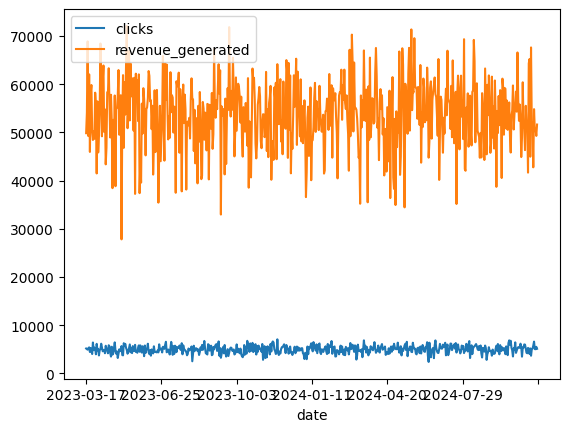

In [22]:
marketing_df.groupby('date')[['clicks', 'revenue_generated']].sum().plot()


# 4-What are the top 5 campaigns in terms of revenue?


In [23]:
marketing_df.sort_values(by='revenue_generated', ascending=False).head(5)


campaign_id     campaign_name        date target_audience channel  \
3565       499454   Weekend Special  2023-10-06       New Users   Email   
3872        86830    Festival Offer  2023-09-02        Inactive     App   
4853       583577    Festival Offer  2023-05-16         Premium   Email   
2971       503991   Weekend Special  2023-12-11       New Users     App   
5291       896959  Referral Program  2023-03-29             All   Email   

      impressions  clicks  conversions    spend  revenue_generated  roas  
3565         3064     340           85  4534.40            9999.54  1.60  
3872         5856     749           48  4608.58            9997.70  3.11  
4853         5138     598           63  1690.70            9992.76  3.45  
2971         4392     828           77  3057.43            9989.43  2.35  
5291         4563     826           40  3132.83            9986.03  3.97

#5-Campaign distribution by channels and target groups (number of campaigns in each mix).


In [26]:
pd.crosstab(marketing_df['channel'], marketing_df['target_audience'])


target_audience  All  Inactive  New Users  Premium
channel                                           
App              355       363        350      306
Email            343       325        328      347
SMS              310       342        333      355
Social Media     334       317        345      347

#6-Customer Acquisition Cost (CAC)



In [31]:

marketing_df['cac'] = marketing_df['spend'] / marketing_df['conversions']

marketing_df[['campaign_id', 'campaign_name', 'spend', 'conversions', 'cac']].head()


campaign_id      campaign_name    spend  conversions         cac
0       548299  New User Discount  1431.85           78   18.357051
1       390914    Weekend Special  4506.34           45  100.140889
2       834385     Festival Offer  4524.23           78   58.002949
3       241523         Flash Sale  3622.79           86   42.125465
4       595111   Membership Drive  2888.99           54   53.499815

In [30]:
cac_by_channel = marketing_df.groupby('channel')['cac'].mean().reset_index()
print(cac_by_channel)

cac_by_audience = marketing_df.groupby('target_audience')['cac'].mean().reset_index()
print(cac_by_audience)


        channel        cac
0           App  79.606469
1         Email  74.497992
2           SMS  77.214935
3  Social Media  79.528966
  target_audience        cac
0             All  80.706120
1        Inactive  78.387703
2       New Users  75.222304
3         Premium  76.611228
